# Data Mining and Statistics
## Session 5 - Classification
*Peter Stikker - Haarlem, the Netherlands - v1.1*

----

In [48]:
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# pandas as pd   
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')    



NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported


# 5.1. Naive Bayes

Naive Bayes is named after Bayes Theorem, which is:

\begin{equation*}
P(A|B) = \frac{P(B|A)\times P(A)}{P(B)}
\end{equation*}

The $P(A|B)$ needs to be read as 'the probability of A, given that B has occured'. Bayes Theorem makes it possible to calculate this if we have the probability of B, given A ($P(B|A)$).

On the slides we'll do a quick manual calculation, so lets focus here on applying the Naive Bayes.

You might be wondering why it's called 'Naive'. Thats because it assumes that the indpendent variables do not depent on each other, which is termed 'naive'.

### 5.1.1. Naive Bayes with Categorical Input

Most explanations on how Naive Bayes works, is done by using an example with Categorical data. Oddly enough most examples that show applications in Python, work with numerical data. Sklearn has not yet added an option for dealing with categorical data in their stable release, but there is luckily one in beta stage.

We begin with loading in some example data. This was based on the data at https://medium.com/@prgopinath100/naive-bayes-classifier-dd8b179b5d90. 

In [49]:
# variable name 'seldf' as in 'selection data frame'
seldf=pd.read_csv('../data/selection.csv', sep = ';', names=["experience", "form", "fitness", "selected"])
seldf

,experience,form,fitness,selected
1,Senior,Hot,Average,Yes
2,Beginner,Rusty,Athlete,Yes
3,Senior,Cold,Injured,No
4,Junior,Hot,Athlete,Yes
5,Senior,Rusty,Average,No
6,Senior,Hot,Athlete,Yes
7,Senior,Hot,Athlete,No
8,Junior,Cold,Average,Yes
9,Beginner,Rusty,Average,No
10,Beginner,Rusty,Injured,Yes


To use the sklearn Naive Bayes option for Categorical input we unfortunately this will need to be re-coded into numerical values. We first let panda know which fields are 'Categorical':

In [50]:
seldf["experience"]=pd.Categorical(seldf["experience"])
seldf["form"]=pd.Categorical(seldf["form"])
seldf["fitness"]=pd.Categorical(seldf["fitness"])
seldf["selected"]=pd.Categorical(seldf["selected"])

Now for each field the different categories can be obained using cat.code:

In [51]:
seldf["experience"].cat.categories

Index(['Beginner', 'Junior', 'Senior'], dtype='object')

And the numeric values of the field can be shown using .cat.codes:

In [52]:
seldf["experience"].cat.codes

1     2
2     0
3     2
4     1
5     2
6     2
7     2
8     1
9     0
10    0
11    1
dtype: int8

We need the numeric codes, so we build a numpy array using those codes:

In [53]:
# The variable name 'selarr' was chosen, short for 'selection array'
selarr = np.asarray(seldf["experience"].cat.codes)
selarr = np.dstack((selarr, np.asarray(seldf["form"].cat.codes)))
selarr = np.dstack((selarr, np.asarray(seldf["fitness"].cat.codes)))
selarr = np.dstack((selarr, np.asarray(seldf["selected"].cat.codes)))
selarr = np.squeeze(selarr)
selarr

array([[2, 1, 1, 1],
       [0, 2, 0, 1],
       [2, 0, 2, 0],
       [1, 1, 0, 1],
       [2, 2, 1, 0],
       [2, 1, 0, 1],
       [2, 1, 0, 0],
       [1, 0, 1, 1],
       [0, 2, 1, 0],
       [0, 2, 2, 1],
       [1, 0, 2, 0]], dtype=int8)

Finally we can build our model.

Define our predictors, and what we want to predict:

In [54]:
X=selarr[:,0:3]     ##the experience, form, and fitness
y=selarr[:,3]       ##the selection

Now we can use the CategoricalNB from sklearn:

In [55]:
from sklearn.naive_bayes import CategoricalNB

Now, let's see how this performs:

In [56]:
catNB = CategoricalNB()
catNB.fit(X, y)
print(catNB.predict(X))

[1 1 0 1 0 1 1 0 1 0 0]


So these are the results of the analysis for the 'selected'. As a reminder we can find out what a 0 or 1 means:

In [57]:
seldf["selected"].cat.categories

Index(['No', 'Yes'], dtype='object')

So a 0 = no and 1 = yes. The earlier found [1 1 0 1 0 1 1 1 0 1 0 0] therefor indicates that the first and second person is predicted to be selected, the third isn't, the fourth is, etc.

To see how well the model performed:

In [58]:
catNB.score(X,y)

0.6363636363636364

The model was correct is 64% of the cases. It was wrong for person 7, 8, 9 and 10, so correct in 7 out of 11 cases, which indeed equals 64%.

And to actually see the probabilities:

In [59]:
catNB.predict_proba(X)

array([[0.44165758, 0.55834242],
       [0.28341498, 0.71658502],
       [0.78068109, 0.21931891],
       [0.16510395, 0.83489605],
       [0.61270802, 0.38729198],
       [0.28341498, 0.71658502],
       [0.28341498, 0.71658502],
       [0.54265297, 0.45734703],
       [0.44165758, 0.55834242],
       [0.54265297, 0.45734703],
       [0.64025997, 0.35974003]])

The first person is predicted to have a 44% chance of not being selected, and a 56% chance of being selected. Since 56 > 44, we'd predict this person to be selected.

Lets do a prediction for someone whos experience = 1, form = 1 and Fitness = 1:

In [60]:
myTest=[1,1,1]
myTest=np.array(myTest)
myTest = myTest.reshape(1, -1)
print(catNB.predict(myTest))

[1]


The predicted result is a 1, so a good chance to be selected.

**Exercise 1**

Determine who is most likely to win in a match between a Southpaw fighter and a Orthodox player.

Use the UFC2019.csv dataset and of course a naive Bayesian analysis.

In [61]:
# Load the data
ufc_df = pd.read_csv('../data/UFC2019.csv')

# Show first few rows
ufc_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [62]:
# Create subset of data and remove missing values
ufc_df = ufc_df.dropna()
ufc_df_ss = ufc_df[['R_Stance', 'Winner', 'B_Stance']]
ufc_df_ss.dropna()

# Convert panda fields to categorical
ufc_df_ss['R_Stance'] = pd.Categorical(ufc_df_ss['R_Stance'])
ufc_df_ss['B_Stance'] = pd.Categorical(ufc_df_ss['B_Stance'])
ufc_df_ss['Winner'] = pd.Categorical(ufc_df_ss['Winner'])

# # get the numerical values as a numpy array
num_arr = np.asarray(ufc_df_ss["Winner"].cat.codes)
num_arr = np.dstack((num_arr, np.asarray(ufc_df_ss["R_Stance"].cat.codes)))
num_arr = np.dstack((num_arr, np.asarray(ufc_df_ss["B_Stance"].cat.codes)))
num_arr = np.squeeze(num_arr)
num_arr

C:\Users\ruben\AppData\Local\Temp\ipykernel_13432\2771176384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_df_ss['R_Stance'] = pd.Categorical(ufc_df_ss['R_Stance'])
C:\Users\ruben\AppData\Local\Temp\ipykernel_13432\2771176384.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_df_ss['B_Stance'] = pd.Categorical(ufc_df_ss['B_Stance'])
C:\Users\ruben\AppData\Local\Temp\ipykernel_13432\2771176384.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

array([[2, 1, 1],
       [2, 2, 1],
       [2, 1, 1],
       ...,
       [2, 1, 1],
       [2, 1, 1],
       [2, 1, 2]], dtype=int8)

In [63]:
ufc_df[['R_Stance', 'Winner', 'B_Stance']].head()

,R_Stance,Winner,B_Stance
0,Orthodox,Red,Orthodox
1,Southpaw,Red,Orthodox
2,Orthodox,Red,Orthodox
3,Orthodox,Blue,Switch
4,Southpaw,Blue,Southpaw


In [64]:
# set the independent (X) and dependent variable (Y)
X = num_arr[:,1:2]
Y = num_arr[:,0]

In [65]:
# Create and fit the model
catNB = CategoricalNB()
catNB.fit(X,Y)
print(catNB.predict(X))

[2 2 2 ... 2 2 2]


In [66]:
ufc_df_ss['Winner'].cat.categories

Index(['Blue', 'Draw', 'Red'], dtype='object')

In [67]:
# Show some results


**Exercise 2**

Another example taken from: https://www.saedsayad.com/naive_bayesian.htm. The data is already available as 'playGolf.csv'. Load this data and create a model to predict if we can go Play or not.

If you have time to spare, you could look into the conversion of the categories into the numerical ones by using the LabelEncoder option of sklearn.

In [68]:
# Load the data


# Show first few rows


In [69]:
# Convert panda fields to categorical

# get the numerical values as a numpy array


# set the independent (X) and dependent variable (Y)


# Create and fit the model


# Show some results


### 5.1.2. Naive Bayes with numerical data

So, now that we've seen how to create a Naive Bayes model, using categorical input variables. Lets go to the more commonly used version, with numerical data. 

With numerical data we usually cannot do a simple frequency count (many scores would have a frequency of 1 or just a few). For these it is often assumed they will follow a Normal Distribution, a.k.a. Gaussian Distribution. We won't go into the details of this and leave the calculations up to Python.

First again some example data:

In [70]:
# Load original UFC data
UFCdata=pd.read_csv('../data/UFC2019.csv',sep = ',', header=0)
# store field names in separate list
UFCfields=list(UFCdata.columns)

#Convert numerical fields into own dataframe.
UFCnum=pd.DataFrame()

for i in UFCfields:
    if (UFCdata[i].dtype=='int64' or UFCdata[i].dtype=='float64'):
        UFCnum[i]=UFCdata[i]

#Add the winner
UFCnum['Winner']=UFCdata['Winner']

C:\Users\ruben\AppData\Local\Temp\ipykernel_13432\3768012458.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  UFCnum[i]=UFCdata[i]
C:\Users\ruben\AppData\Local\Temp\ipykernel_13432\3768012458.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  UFCnum[i]=UFCdata[i]
C:\Users\ruben\AppData\Local\Temp\ipykernel_13432\3768012458.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Now to make the model and look at the prediction:

In [71]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Import the GaussianNB so we can use the commonly used Gaussian transformation
from sklearn.naive_bayes import GaussianNB

# Set our model to this GaussianNB
gaussNB = GaussianNB()

#Get the specific fields of interest
mDat =UFCnum[["B_age", "R_age", "Winner"]]
# remove missing records and draws
mDat=mDat.dropna()
mDat = mDat[mDat.Winner != 'Draw']

# Set input and output
X = mDat[["B_age", "R_age"]]
y = mDat["Winner"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)


#Create the model and prediction
gaussNB.fit(X_train, y_train)
y_pred = gaussNB.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.662217659137577


In [72]:
y_train

4848    Red
3549    Red
3789    Red
439     Red
3229    Red
       ... 
2680    Red
2486    Red
142     Red
3378    Red
3396    Red
Name: Winner, Length: 3894, dtype: object

Our model had 66% correct in the testing data.

We can have a more detailed look, by looking at the so-called confusion matrix:

In [73]:
print(confusion_matrix(y_test, y_pred))

[[ 19 311]
 [ 18 626]]


The top left value of 19, indicates that our model predicted a blue and it actually also was a blue 19 times.

The bottom right value of 626 indicates that our model predicted a red and it actually also was a red 626 times.

In the other cases it was wrong (311 times predicted red, but was blue, and 18 times predicted blue and was red).

To double-check the math:

In [74]:
(19+626)/(19+311+18+626)

0.662217659137577

The same 66% as we saw earlier.

We can see that it did try its best:

In [75]:
gaussNB.predict_proba(X)

array([[0.36548041, 0.63451959],
       [0.33100783, 0.66899217],
       [0.35159766, 0.64840234],
       ...,
       [0.31315141, 0.68684859],
       [0.26419808, 0.73580192],
       [0.43760234, 0.56239766]])

### 5.1.3. Only binary outcomes?
What if our outcome variable is not two, but three or more categories?

Well lets see what happens if we don't remove the draws.

In [76]:
# The original data
mDat = UFCnum[["B_age", "R_age", "Winner"]]
winTypes ={"Red":0, "Blue":1, "Draw":2} 

# Convert 'Winner' to numerical values as a list
numWin = [winTypes[i] for i in mDat["Winner"]]  
numWin = pd.DataFrame(numWin)

# Combine the two data frames
mDat = pd.concat([mDat,numWin], axis=1, sort=False)

# Remove the original 'Winner'
mDat = mDat.drop(["Winner"], axis=1)

# Rename the columns
mDat.columns = ["B_age", "R_age", "Winner"]

#Remove the missing values
mDat=mDat.dropna()

# Now get X and Y:
X = mDat[["B_age", "R_age"]]
y = mDat["Winner"]

# And convert them to a numpy array
X = np.asarray(X)
y = np.asarray(y)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

#Create the model and prediction
gaussNB.fit(X_train, y_train)
y_pred = gaussNB.predict(X_test)

# Finally the result:
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6717171717171717
[[646  12   0]
 [294  19   0]
 [ 19   0   0]]


Well, there doesn't seem to be any problem. 

It did not predict any draws, but we only have 19 draws.

In [77]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2], dtype=int64), array([658, 313,  19], dtype=int64))

**Exercise 3**

Improve the model by adding some other variables you think might be useful...

### 5.1.4. Other similar techniques
We discussed the basic ideas and concepts of the Naive Bayes method for classification. There is also 

* Multinomial Naive Bayes <br>
Helpful if your numerical values are counts.
* Complement Naive Bayes <br>
an extension of Multinomial Naive Bayes and used if the dataset is imbalanced.
* Bernoulli Naive Bayes <br>
if you have binary/boolean features.
* Average One-Dependence Estimators (AODE), which is a bit out of scope from this course.

Before we finish this chapter. Lets take a quick peek at our original data and the winners (should we have done this when we started?)

In [78]:
UFCdata["Winner"].value_counts()

Red     3470
Blue    1591
Draw      83
Name: Winner, dtype: int64

Hm. Only 83 draws and Red seems to win most of the time. Is there a reason why this might happen? We would need an expert on MMA to find this out. Perhaps if we see Micha he can explain. 

Alright, perhaps another technique can improve our performance.

<center><b>BACK TO THE SLIDES</b></center>

## 5.2. Support Vector Machines

Sklearn has a nice Python script themselves to be used as an example (https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html) and also on https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html some very nice explanations are given. So lets not re-invent the wheel, and I've used some of their bits.

Beginning with creating some data.

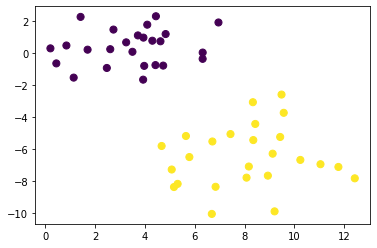

In [79]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=18, cluster_std=1.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

Now to create our Support Vector Machine (or Support Vector Classifier). 

We first use the linear kernel:

In [80]:
# Import the required SVC package from sklearn
from sklearn.svm import SVC

# Create the model, then fit the model, and determine the predicted values
svmLin = SVC(kernel='linear')
svmLin.fit(X, y)
y_pred = svmLin.predict(X)

# Finally the result:
print(metrics.accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))

1.0
[[25  0]
 [ 0 25]]


We can also show the result, using the small function below:

In [81]:
def showHyperplane(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svmLin.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svmLin.support_vectors_[:, 0], svmLin.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

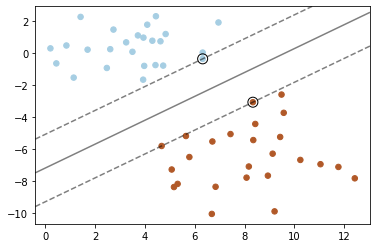

In [82]:
showHyperplane(X, y, svmLin)

The other example on the slides was the circular data.

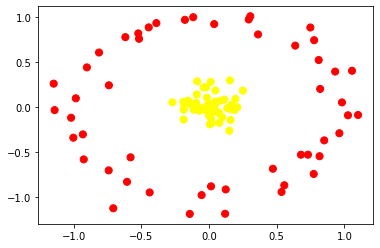

In [83]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Oh, oh. Doesn't look promising to draw a straight line to separate the red from yellow dots. Lets see how well sklearn can do this anyway:

In [84]:
svmLin = SVC(kernel='linear').fit(X, y)
svmLin.score(X,y)

0.68

Hm, still 69% correct. What would this look like:

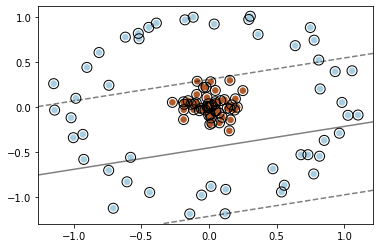

In [85]:
showHyperplane(X,y,svmLin)

Well, its something but by observation alone we can see that the hyperplane should not be a straight line anymore, but a circle is much more obvious.

Translate our scores to circle-style:

In [86]:
Z=X[:,0]**2+X[:,1]**2

Visualize using ipywidgets, so make sure you have installed it (using pip install ipywidgets)

In [87]:
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], Z, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Z')

interact(plot_3D, elev=[20, 70], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(20, 70), value=20), IntSlider(value=30, descriptio…

Find the plane that separates these points:

In [88]:
svmRBF = SVC(kernel='rbf').fit(X, y)
y_pred = svmRBF.predict(X)

# The result:
print(metrics.accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))

1.0
[[50  0]
 [ 0 50]]


Great. This separates all our points correctly (we should of course use some test and training data, but you get the point)

Lets apply this to our UFC data. First just in case select the data again, and split the data.

In [89]:
#Make a subset of the data and remove missing values
UFCsel = UFCdata[["Winner", "B_age", "R_age"]]
UFCsel=UFCsel.dropna()

#Determine input and output variables
X = UFCsel[["B_age", "R_age"]]
y = UFCsel["Winner"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

In [90]:
UFCsel

,Winner,B_age,R_age
0,Red,31.0,32.0
1,Red,32.0,31.0
2,Red,36.0,35.0
3,Blue,26.0,29.0
4,Blue,32.0,26.0
...,...,...,...
5136,Red,34.0,26.0
5138,Red,29.0,26.0
5140,Red,30.0,29.0
5141,Red,30.0,26.0


Now to create the models:

In [91]:
# SVM with linear kernel
svmLin = SVC(kernel='linear')
svmLin.fit(X_train, y_train)
y_pred = svmLin.predict(X_test)

print('SVM Linear Kernel results')
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('')

# SVM with Radial Basis Function kernel
rbfKer = SVC(kernel='rbf')
rbfKer.fit(X_train, y_train)
y_pred = rbfKer.predict(X_test)

print('SVM RBF Kernel results')
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVM Linear Kernel results
accuracy score:  0.6646464646464646
[[  0   0 313]
 [  0   0  19]
 [  0   0 658]]

SVM RBF Kernel results
accuracy score:  0.6666666666666666
[[  6   0 307]
 [  0   0  19]
 [  4   0 654]]


There some other kernels as well available in sklearn. Unfortunately not enough time to explain all of them, but just FYI:

In [92]:
#This one takes a long time, so commented it out

# # SVM with Polynomial kernel
# svmPol = SVC(kernel='poly')
# svmPol.fit(X_train, y_train)
# y_pred = svmPol.predict(X_test)

# print('accuracy score: ',metrics.accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

#Result was 0.6636363636...

In [93]:
# SVM with Sigmoid Kernel
svmSigm = SVC(kernel='sigmoid')
svmSigm.fit(X_train, y_train)
y_pred = svmSigm.predict(X_test)

print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy score:  0.6646464646464646
[[  0   0 313]
 [  0   0  19]
 [  0   0 658]]


One thing to definately check is how many support vectors we actually have. If this is too high we might be overfitting the data. Usually at 10% or more you should get a bit worried.

In [94]:
print('Linear kernel percentage: ',len(svmLin.support_)/len(X_train))
print('RBF kernel percentage: ',len(svmRBF.support_)/len(X_train))
#print('Polynomial kernel percentage: ',len(polKer.support_)/len(X_train))
print('Sigmoid kernel percentage: ',len(svmSigm.support_)/len(X_train))

Linear kernel percentage:  0.6743304699343102
RBF kernel percentage:  0.003284487114704396
Sigmoid kernel percentage:  0.6596766043456291


Ai, thats more than 65% of our test data points are used to create the hyperplane itself, except for the RBF kernel. So at this moment I'd go for that one.

For the other kernels we might need to soften our margin (the C parameter). 

But lets see how another technique might actually perform...

<center><b>BACK TO THE SLIDES</b></center>

## 5.3. KNN Classification

On the slides the basic idea of kNN was discussed. Implementing this with sklearn is very similar as we've seen before:

In [95]:
# import the KNeighborsClassifier package
from sklearn.neighbors import KNeighborsClassifier

# Setup and fit the model (we use the same data as before)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create the prediction
y_pred=knn.predict(X_test)

# Show the results
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy score:  0.6101010101010101
[[ 77   0 236]
 [  7   0  12]
 [131   0 527]]


Almost a must in KNN classification is to set the data to a standard scale. This is accomplished by subtracting the mean from each value, and then divide the result by the standard deviation. These are also known as Z-scores. In formula notation:

\begin{equation*}
Z = \frac{x - \bar{x}}{\sigma}
\end{equation*}

The $\bar{x}$ is the mean of field X, and $\sigma$ is the population standard deviation (the sample standard deviation to be a bit more precise)

We could of course easily do this ourselves:

In [96]:
Zscores = (X_train - X_train.mean())/X_train.std(ddof=0)

But of course, sklearn has us covered...

In [97]:
# Import the standardscaler package
from sklearn.preprocessing import StandardScaler

# set the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Convert the train and test X values, using the same scaler (so based on the X_train)
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

Quick check if they are indeed the same:

In [98]:
X_trainScaled - Zscores

,B_age,R_age
4661,0.0,0.0
4746,0.0,0.0
3681,0.0,0.0
1421,0.0,0.0
4813,0.0,0.0
...,...,...
2636,0.0,0.0
2448,0.0,0.0
142,0.0,0.0
3318,0.0,0.0


Lets see if this pays off.

In [99]:
knn.fit(X_trainScaled, y_train)
y_pred=knn.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))

0.6111111111111112


Changed a bit, but not much.

One suggestion for the setting of k (the number of neighbors to consider) is to take the square root of the number of data points:

In [100]:
X_train.shape[0]**0.5

62.91263784010332

An odd number is usually preferred (to avoid ties), so lets use 63 and see if that helps:

In [101]:
knn = KNeighborsClassifier(n_neighbors=63)

knn.fit(X_trainScaled, y_train)
y_pred=knn.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))

0.6585858585858586


That's about 3% better. We can also just iterate over a range and look which performs best:

In [102]:
# Thanks for the script: https://datascienceplus.com/k-nearest-neighbors-knn-with-python/
error_rate=[]
for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainScaled, y_train)
    pred_i = knn.predict(X_testScaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

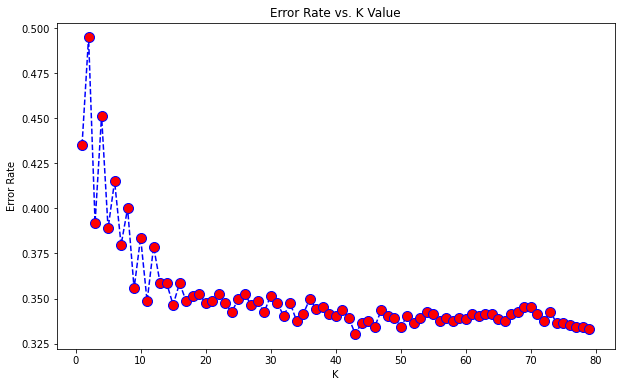

In [103]:
plt.figure(figsize=(10,6))
plt.plot(range(1,80),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

At 43 things go slightly up again and not much differences anymore after that. Lets check it out:

In [104]:
knn = KNeighborsClassifier(n_neighbors=43)

knn.fit(X_trainScaled, y_train)
y_pred=knn.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))

0.6696969696969697


Hm, only another 1% increase in our performance, but less computational than the k=63

Another approach could be to use the so called 'GridSearchCV' package, which will iterate over a lot of settings.

In [105]:
from sklearn.model_selection import GridSearchCV

The code below was copied from https://medium.com/datadriveninvestor/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

I've commented out the code since it takes a very long time.

In [106]:
## List Hyperparameters that we want to tune.
#leaf_size = list(range(1,50))
#n_neighbors = list(range(1,30))
#p=[1,2]
##Convert to dictionary
#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
##Create new KNN object
#knn_2 = KNeighborsClassifier()
##Use GridSearch
#clf = GridSearchCV(knn_2, hyperparameters, cv=10)
##Fit the model
#best_model = clf.fit(X_trainScaled, y_train)
##Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# The result was a leaf size of 1, p of 1 and 29 neighbors

Using the results:

In [107]:
knnOptimal = KNeighborsClassifier(n_neighbors=29, leaf_size=1, p=1)
y_pred=knn.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6696969696969697
[[ 29   0 284]
 [  2   0  17]
 [ 24   0 634]]


Similar result, but a lot lower number of neighbors.

Our model never seems to predict a 'Draw'. One possible reason might be that we are looking at the 29 neighbors of a point, and we only have 17 draws in total. The chances that a draw will win a majority vote is very low.

If you find the confusion matrix, well confusing. You might also use the classification report:

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Blue       0.53      0.09      0.16       313
        Draw       0.00      0.00      0.00        19
         Red       0.68      0.96      0.80       658

    accuracy                           0.67       990
   macro avg       0.40      0.35      0.32       990
weighted avg       0.62      0.67      0.58       990



c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

I'll leave it up to you to google on how to interpret this, since we still have a lot to discuss. There are so many more techniques.

The optimal settings from GridSearch set something called 'leafs'. To understand this better it can help to look at our next technique: Decision Trees.....

<center><b>BACK TO THE SLIDES</b></center>

## 5.3. Decision trees

The concept of Decision trees is explained on the slide. The simplest version requires another package, so **first run 'pip install decision-tree-id3' in shell**, then come back here to actually load the package

In [109]:
# !pip install decision-tree-id3

# importing it directly seems to have a small bug, so
# first import six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six
# then finally id3
from id3 import Id3Estimator

In [110]:
id3_dtc=Id3Estimator()
id3_dtc.fit(X_trainScaled,y_train)
y_pred = id3_dtc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6646464646464646
[[  0   0 313]
 [  0   0  19]
 [  0   0 658]]


Not bad.

sklearn also has a 'DecisionTreeClassifier' and we can set the criterion for that to 'entropy':

In [111]:
from sklearn.tree import DecisionTreeClassifier 

ent_dtc = DecisionTreeClassifier(criterion = "entropy")
ent_dtc.fit(X_trainScaled,y_train)
y_pred = ent_dtc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6333333333333333
[[ 67   0 246]
 [  5   0  14]
 [ 96   2 560]]


Hmm. The documentation of DecisionTreeClassifier mentions: "...“entropy” for the information gain.", so this should be the same as the id3. It could be that either there is a small variation in the id3 method, or sklearn uses different default settings than id3. Something to look into.

Sklearn does not have a pure C4.5 implementation, but usually CART is enough. We can get this by either not setting a criterion (since it's the default), or set it to 'gini':

In [112]:
gini_dtc = DecisionTreeClassifier(criterion = "gini")
gini_dtc.fit(X_trainScaled,y_train)
y_pred = gini_dtc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6333333333333333
[[ 68   0 245]
 [  5   0  14]
 [ 97   2 559]]


The random forest classifier is also available in sklearn:

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfcModel = rfc.fit(X_trainScaled, y_train)
y_pred = rfcModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6505050505050505
[[ 50   0 263]
 [  3   0  16]
 [ 63   1 594]]


Just because its there, a quick show of the Extra Trees classifier:

In [114]:
from sklearn.ensemble import ExtraTreesClassifier

# Extremly Random Forest (a.k.a. Extra trees)
erfc = ExtraTreesClassifier(random_state=0)
erfc = erfc.fit(X_trainScaled, y_train)
y_pred = erfc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6343434343434343
[[ 66   0 247]
 [  5   0  14]
 [ 95   1 562]]


The Random Forest and Extra Trees seem to outperform the best decision tree. Actually Random Forest and Extra Trees are not really a decision tree, but more a decision tree**s**. This is because it is a bagging (bootstrap aggregation) technique. What's that you ask? Well....

<center><b>BACK TO THE SLIDES</b></center>

## 5.4. And Many More

In this section just some basic code showing a few more methods.

**Linear Discriminant Analysis**

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
ldaModel=lda.fit(X_trainScaled, y_train)
y_pred=ldaModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6737373737373737
[[ 21   0 292]
 [  0   0  19]
 [ 12   0 646]]


**Quadratic Discriminant Analysis**

In [116]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qdaModel=qda.fit(X_trainScaled, y_train)
y_pred=ldaModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6737373737373737
[[ 21   0 292]
 [  0   0  19]
 [ 12   0 646]]


**Logistic Regression Classification**

In [117]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
lrModel = logreg.fit(X_trainScaled, y_train)
y_pred = lrModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6737373737373737
[[ 21   0 292]
 [  0   0  19]
 [ 12   0 646]]


**Multinomial Logistic Regression Classification**

In [118]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial')
lrModel = logreg.fit(X_trainScaled, y_train)
y_pred = lrModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6737373737373737
[[ 21   0 292]
 [  0   0  19]
 [ 12   0 646]]


**AdaBoos**
(Adaptive Boosting)

In [119]:
from sklearn.ensemble import AdaBoostClassifier

adaBst = AdaBoostClassifier(random_state=0)
adaBst = adaBst.fit(X_trainScaled, y_train)
y_pred = adaBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6686868686868687
[[ 13   0 300]
 [  1   0  18]
 [  9   0 649]]


**Gradient Boosting**

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

gradBst = GradientBoostingClassifier(random_state=0)
gradBst = gradBst.fit(X_trainScaled, y_train)
y_pred = gradBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6686868686868687
[[ 12   0 301]
 [  0   0  19]
 [  8   0 650]]


**Histogram Gradient Boosting**

In [121]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

histBst = HistGradientBoostingClassifier(random_state=0)
histBst = histBst.fit(X_trainScaled, y_train)
y_pred = histBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.6575757575757576
[[ 50   0 263]
 [  4   0  15]
 [ 55   2 601]]


**Stacking**

In [122]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))]

stackCl = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stackCl.fit(X_trainScaled, y_train)
y_pred = stackCl.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6676767676767676
[[ 14   0 299]
 [  0   0  19]
 [ 11   0 647]]


**Dummy Classifier - Most Frequent** <br>
Sometimes referred to as ZeroR classification.

In [123]:
from sklearn.dummy import DummyClassifier

dumMF = DummyClassifier(strategy='most_frequent')
dumMF = dumMF.fit(X_train, y_train)
y_pred = dumMF.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6646464646464646
[[  0   0 313]
 [  0   0  19]
 [  0   0 658]]


**Dummy Classifier - Stratified**

In [124]:
# Dummy classifier with stratified method
dumSrat = DummyClassifier(strategy="stratified")
dumSrat = dumSrat.fit(X_trainScaled, y_train)
y_pred = dumSrat.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5414141414141415
[[ 95   3 215]
 [  1   0  18]
 [208   9 441]]


**Dummy Classifier - Prior**

In [125]:
dumPrior = DummyClassifier(strategy="prior")
dumPrior.fit(X_trainScaled, y_train)
y_pred = dumPrior.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6646464646464646
[[  0   0 313]
 [  0   0  19]
 [  0   0 658]]


**Dummy Clasifier - Uniform**

In [126]:
dumUni = DummyClassifier(strategy="uniform")
dumUni.fit(X_trainScaled, y_train)
y_pred = dumUni.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.32222222222222224
[[ 99 110 104]
 [  8   5   6]
 [213 230 215]]


<center><b>BACK TO THE SLIDES</b></center>

# Encore

After all these different models, I was a bit curious to just list all of them in one go. So...

In [127]:
# Create a panda dataframe to keep track of the scores
accScores = pd.DataFrame(columns = ['model', 'score'])

# Create a list with all the different models (except polynomial svm).
models =[["Dummy - Uniform", DummyClassifier(strategy="uniform")]]
models.append(['Dummy - Most Freq.', DummyClassifier(strategy="stratified")])
models.append(['Dummy - Prior', DummyClassifier(strategy="prior")])
models.append(['Dummy - Most Freq.', DummyClassifier(strategy='most_frequent')])
models.append(['NB - Gaussian', GaussianNB()])
models.append(['SVM - Gaussian', SVC(kernel='linear')])
models.append(['SVM - RBF', SVC(kernel='rbf')])
models.append(['SVM - Sigmoid', SVC(kernel='sigmoid')])
models.append(['kNN', KNeighborsClassifier(n_neighbors=29, leaf_size=1, p=1)])
models.append(['DT - ID3', Id3Estimator()])
models.append(['DT - ID3 (sklearn)', DecisionTreeClassifier(criterion = "entropy")])
models.append(['DT - CART', DecisionTreeClassifier(criterion = "gini")])
models.append(['Bagging - Random Forest', RandomForestClassifier(random_state=0)])
models.append(['Bagging - Extra Trees', ExtraTreesClassifier(random_state=0)])
models.append(['LDA', LinearDiscriminantAnalysis()])
models.append(['QDA', QuadraticDiscriminantAnalysis()])
models.append(['Logistic Regression', LogisticRegression()])
models.append(['Multinomial LR', LogisticRegression(multi_class='multinomial')])
models.append(['Boosting - AdaBoost', AdaBoostClassifier(random_state=0)])
models.append(['Boosting - Gradient', GradientBoostingClassifier(random_state=0)])
models.append(['Boosting - Histogram Gradient', HistGradientBoostingClassifier(random_state=0)])
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))]
models.append(['Stacking', StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())])

In [128]:
# Now to iterate over all of them:
for i in models:
    model = i[1]
    model.fit(X_trainScaled, y_train)
    y_pred = model.predict(X_testScaled)
    score=metrics.accuracy_score(y_test, y_pred)
    newRow=pd.Series([i[0], score], index=accScores.columns)
    accScores=accScores.append(newRow, ignore_index=True)
    
# And show all results sorted by their score:
accScores.sort_values(by=['score'])

C:\Users\ruben\AppData\Local\Temp\ipykernel_13432\2989326355.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accScores=accScores.append(newRow, ignore_index=True)
C:\Users\ruben\AppData\Local\Temp\ipykernel_13432\2989326355.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accScores=accScores.append(newRow, ignore_index=True)
C:\Users\ruben\AppData\Local\Temp\ipykernel_13432\2989326355.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accScores=accScores.append(newRow, ignore_index=True)
C:\Users\ruben\AppData\Local\Temp\ipykernel_13432\2989326355.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accScores=accScores.append(new

,model,score
0,Dummy - Uniform,0.374747
1,Dummy - Most Freq.,0.531313
7,SVM - Sigmoid,0.565657
11,DT - CART,0.633333
10,DT - ID3 (sklearn),0.633333
13,Bagging - Extra Trees,0.634343
12,Bagging - Random Forest,0.650505
8,kNN,0.656566
20,Boosting - Histogram Gradient,0.657576
2,Dummy - Prior,0.664646


There is also XGboost, but that requires numerical data. If you are interested check out https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/